### Importar las librerías.

In [3]:
import numpy as np
import cProfile
import pstats
import io
import matplotlib.pyplot as plt
import sys
import math

### Se definen los algoritmos de ordenamiento.

In [5]:
# Algoritmo de ordenamiento por inserción
def insertion_sort(A):
    for i in range(1, len(A)):  # Itera sobre la lista desde el segundo elemento
        llave = A[i]  # Elemento actual a insertar en la posición correcta
        j = i - 1
        while j >= 0 and A[j] > llave:  # Mueve los elementos mayores hacia la derecha
            A[j+1] = A[j]
            j -= 1
        A[j + 1] = llave  # Inserta el elemento en la posición correcta
        
# Cormen, T; Leiserson, C; Rivest, R. y Stein, c. (2009). Introduction to Algorithms, 3rd ed.

In [6]:
# Función auxiliar para fusionar dos subarreglos ordenados
def merge(A, p, q, r):
    L = A[p:q + 1]  # Subarreglo izquierdo
    R = A[q + 1:r + 1]  # Subarreglo derecho
    L = np.append(L, float('inf'))  # Agrega un marcador de infinito
    R = np.append(R, float('inf'))

    i, j = 0, 0
    for k in range(p, r + 1):  # Combina los subarreglos en el arreglo original
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

# Algoritmo de ordenamiento por mezcla (Merge Sort)
def merge_sort(A, p, r):
    if len(A) <= 1:
        return A
    if p < r:
        q = (p + r) // 2  # Divide el arreglo en dos mitades
        merge_sort(A, p, q)  # Ordena la mitad izquierda
        merge_sort(A, q + 1, r)  # Ordena la mitad derecha
        return merge(A, p, q, r)  # Fusiona ambas mitades ordenadas

# Cormen, T; Leiserson, C; Rivest, R. y Stein, c. (2009). Introduction to Algorithms, 3rd ed.

In [7]:
sys.setrecursionlimit(10**6)  # Ajusta el límite de recursión para evitar desbordamientos en QuickSort

# Algoritmo de ordenamiento rápido (Quick Sort) con optimización de recursión de cola
def quick_sort(A, p, r):
    while p < r:  
        q = partition(A, p, r)  # Encuentra el pivote
        if q - p < r - q:  # Elige la mitad más pequeña para recursión
            quick_sort(A, p, q - 1)
            p = q + 1  # Procesa la otra mitad iterativamente
        else:
            quick_sort(A, q + 1, r)
            r = q - 1  

# Función auxiliar para particionar el arreglo en Quick Sort
def partition(A, p, r):
    x = A[r]  # Selecciona el pivote (último elemento)
    i = p - 1  # Índice para elementos menores que el pivote
    for j in range(p, r):  # Recorre los elementos del subarreglo
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]  # Intercambia los elementos
    A[i + 1], A[r] = A[r], A[i + 1]  # Coloca el pivote en su posición final
    return i + 1  # Retorna la posición del pivote

# Cormen, T; Leiserson, C; Rivest, R. y Stein, c. (2009). Introduction to Algorithms, 3rd ed.

In [8]:
# Función auxiliar para Counting Sort, utilizada en Radix Sort
def counting_sort(A, exp):
    n = len(A)
    output = [0] * n  # Arreglo de salida
    count = [0] * 10  # Frecuencia de dígitos (0-9)

    # Cuenta la frecuencia de cada dígito en la posición actual
    for i in range(n):
        index = (A[i] // exp) % 10
        count[index] += 1

    # Calcula las posiciones acumulativas en count[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Construye el arreglo de salida ordenado
    i = n - 1
    while i >= 0:
        index = (A[i] // exp) % 10
        output[count[index] - 1] = A[i]
        count[index] -= 1
        i -= 1

    # Copia el arreglo ordenado en A
    for i in range(n):
        A[i] = output[i]

# Algoritmo de ordenamiento por radix (Radix Sort)
def radix_sort(A):
    max_num = max(A)  # Encuentra el número más grande
    exp = 1  # Inicia con el dígito menos significativo

    while max_num // exp > 0:  # Aplica Counting Sort en cada posición decimal
        counting_sort(A, exp)
        exp *= 10  # Avanza a la siguiente posición decimal

# Cormen, T; Leiserson, C; Rivest, R. y Stein, c. (2009). Introduction to Algorithms, 3rd ed.

In [9]:
# Algoritmo de ordenamiento por selección (Selection Sort)
def selection_sort(A):
    for i in range(0, len(A)):  # Itera sobre cada posición de la lista
        j = np.where(A[i:] == min(A[i:]))[0][0] + i  # Encuentra el mínimo en la sublista
        A[i], A[j] = A[j], A[i]  # Intercambia el mínimo con la posición actual

# Cormen, T; Leiserson, C; Rivest, R. y Stein, c. (2009). Introduction to Algorithms, 3rd ed.

### Se realiza una función que creará muestras uniformes para todas la pruebas.

In [11]:
# Genera muestras de números aleatorios para pruebas de ordenamiento
cantidad_datos = [10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000]
def crear_muestras(lista, semilla=7):
    np.random.seed(semilla)  # Fija la semilla para reproducibilidad
    salida = []
    for i in lista:
        salida.append(np.array(np.random.randint(0, 10000, size=i)))  # Crea muestras aleatorias
    return salida

### Se realizan las pruebas de ordenar para cada algoritmo (listas desordeadas).

In [13]:
prueba_insertion = crear_muestras(cantidad_datos)
tiempos_insertion = []
for i in prueba_insertion:
    profiler = cProfile.Profile()
    profiler.enable()
    insertion_sort(i)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[4])
    tiempos_insertion.append(time_total)

In [14]:
prueba_merge = crear_muestras(cantidad_datos)
tiempos_merge = []
for i in prueba_merge:
    profiler = cProfile.Profile()
    profiler.enable()
    merge_sort(i, 0, len(i)-1)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[7])
    tiempos_merge.append(time_total)

In [15]:
prueba_quick = crear_muestras(cantidad_datos)
tiempos_quick = []
for i in prueba_quick:
    profiler = cProfile.Profile()
    profiler.enable()
    quick_sort(i, 0, len(i)-1)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[7])
    tiempos_quick.append(time_total)

In [16]:
prueba_radix = crear_muestras(cantidad_datos)
tiempos_radix = []
for i in prueba_radix:
    profiler = cProfile.Profile()
    profiler.enable()
    radix_sort(i)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[4])
    tiempos_radix.append(time_total)

In [17]:
prueba_selection = crear_muestras(cantidad_datos)
tiempos_selection = []
for i in prueba_selection:
    profiler = cProfile.Profile()
    profiler.enable()
    selection_sort(i)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[4])
    tiempos_selection.append(time_total)

### Se realizan las gráficas de los tiempos vs la cantidad de elementos de la lista (listas desordenadas).

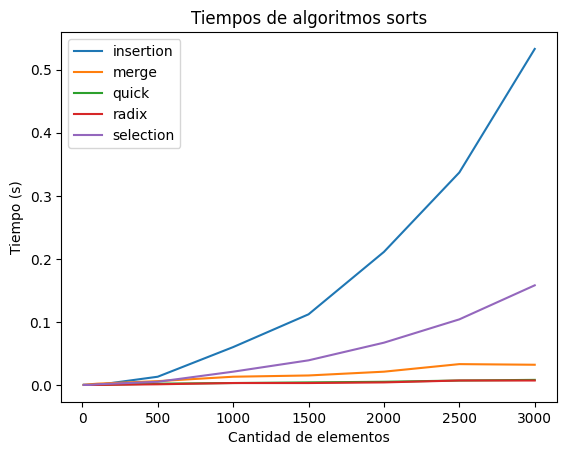

In [19]:
plt.plot(cantidad_datos, tiempos_insertion, label = 'insertion')
plt.plot(cantidad_datos, tiempos_merge, label = 'merge')
plt.plot(cantidad_datos, tiempos_quick, label = 'quick')
plt.plot(cantidad_datos, tiempos_radix, label = 'radix')
plt.plot(cantidad_datos, tiempos_selection, label = 'selection')


plt.title('Tiempos de algoritmos sorts')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

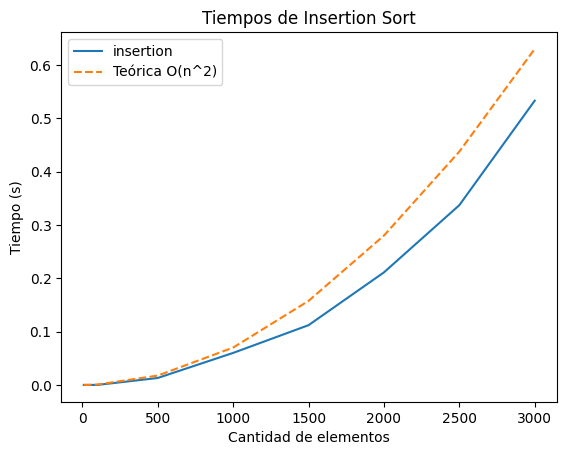

In [20]:
O_n2 = [0.00000007*i**2 for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_insertion, label = 'insertion')
plt.plot(cantidad_datos, O_n2, linestyle='--', label = 'Teórica O(n^2)')

plt.title('Tiempos de Insertion Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

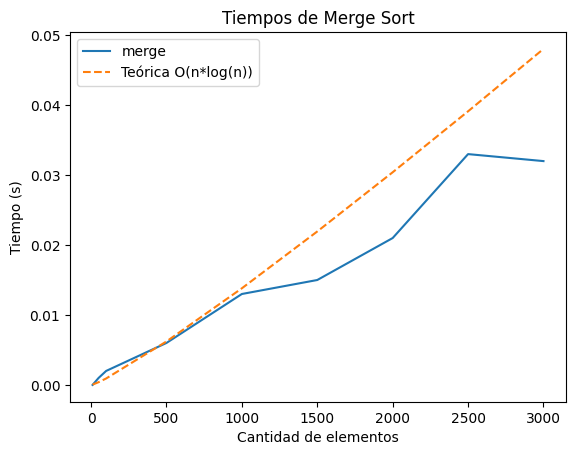

In [21]:
O_n_log_n = [0.000002*i*math.log(i) for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_merge, label = 'merge')
plt.plot(cantidad_datos, O_n_log_n, linestyle='--', label = 'Teórica O(n*log(n))')

plt.title('Tiempos de Merge Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

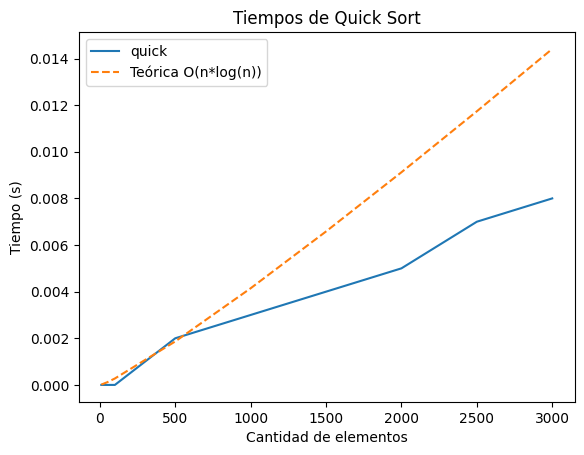

In [22]:
O_n_log_n = [0.0000006*i*math.log(i) for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_quick, label = 'quick')
plt.plot(cantidad_datos, O_n_log_n, linestyle='--', label = 'Teórica O(n*log(n))')

plt.title('Tiempos de Quick Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

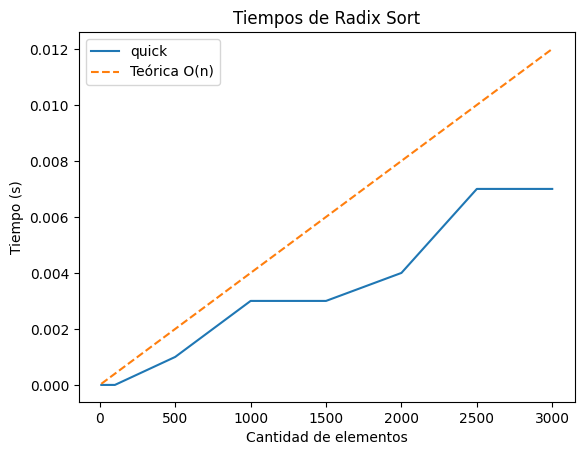

In [23]:
O_n = [0.000004*i for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_radix, label = 'quick')
plt.plot(cantidad_datos, O_n, linestyle='--', label = 'Teórica O(n)')

plt.title('Tiempos de Radix Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

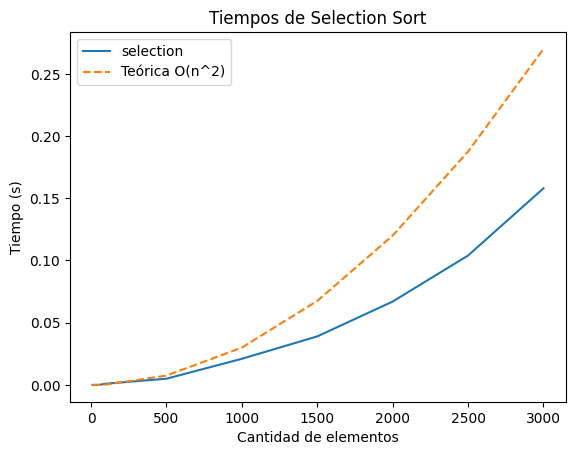

In [24]:
O_n2 = [0.00000003*i**2 for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_selection, label = 'selection')
plt.plot(cantidad_datos, O_n2, linestyle='--', label = 'Teórica O(n^2)')

plt.title('Tiempos de Selection Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

### ### Se realizan las gráficas de los tiempos vs la cantidad de elementos de la lista (Lista ordenada)

In [26]:
tiempos_insertion = []
for i in prueba_insertion:
    profiler = cProfile.Profile()
    profiler.enable()
    insertion_sort(i)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[4])
    tiempos_insertion.append(time_total)

In [27]:
tiempos_merge = []
for i in prueba_merge:
    profiler = cProfile.Profile()
    profiler.enable()
    merge_sort(i, 0, len(i)-1)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[7])
    tiempos_merge.append(time_total)

In [28]:
tiempos_quick = []
for i in prueba_quick:
    profiler = cProfile.Profile()
    profiler.enable()
    quick_sort(i, 0, len(i)-1)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[7])
    tiempos_quick.append(time_total)

In [29]:
tiempos_radix = []
for i in prueba_radix:
    profiler = cProfile.Profile()
    profiler.enable()
    radix_sort(i)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[4])
    tiempos_radix.append(time_total)

In [30]:
tiempos_selection = []
for i in prueba_selection:
    profiler = cProfile.Profile()
    profiler.enable()
    selection_sort(i)
    profiler.disable()
    
    stream = io.StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.strip_dirs().sort_stats("tottime").print_stats()
    output = stream.getvalue()
    lines = output.split('\n')
    line_0 = lines[0]
    time_total = float(line_0.strip().split(' ')[4])
    tiempos_selection.append(time_total)

### Se realizan las gráficas de los tiempos vs la cantidad de elementos de la lista (lista ordenada).

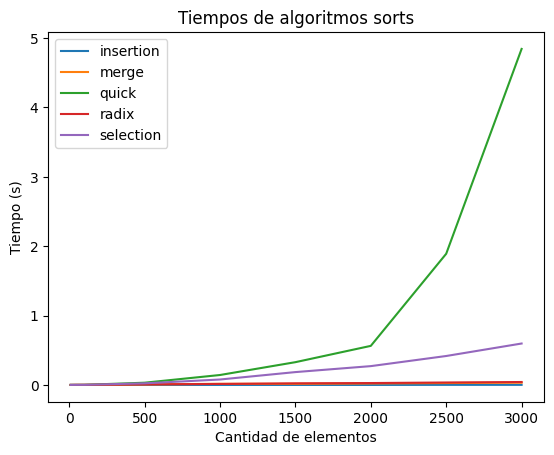

In [32]:
plt.plot(cantidad_datos, tiempos_insertion, label = 'insertion')
plt.plot(cantidad_datos, tiempos_merge, label = 'merge')
plt.plot(cantidad_datos, tiempos_quick, label = 'quick')
plt.plot(cantidad_datos, tiempos_radix, label = 'radix')
plt.plot(cantidad_datos, tiempos_selection, label = 'selection')

plt.title('Tiempos de algoritmos sorts')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

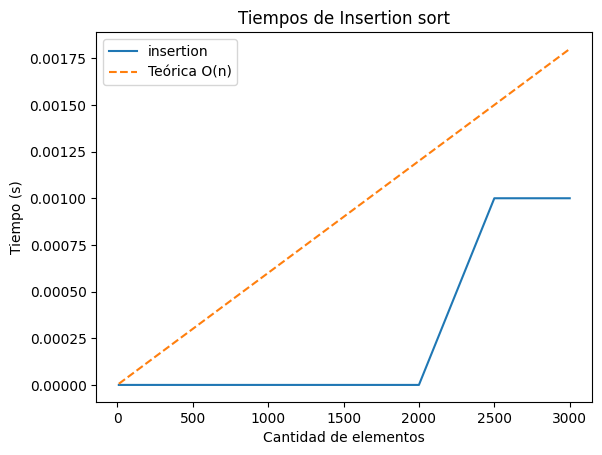

In [33]:
O_n = [0.0000006*i for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_insertion, label = 'insertion')
plt.plot(cantidad_datos, O_n, linestyle='--', label = 'Teórica O(n)')

plt.title('Tiempos de Insertion sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

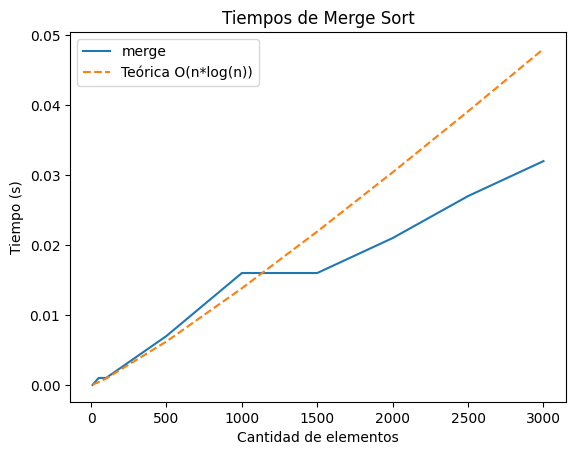

In [34]:
O_n_log_n = [0.000002*i*math.log(i) for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_merge, label = 'merge')
plt.plot(cantidad_datos, O_n_log_n, linestyle='--', label = 'Teórica O(n*log(n))')

plt.title('Tiempos de Merge Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

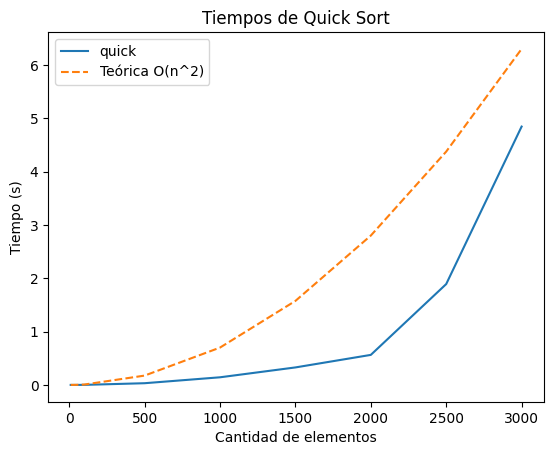

In [35]:
O_n2 = [0.0000007*i**2 for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_quick, label = 'quick')
plt.plot(cantidad_datos, O_n2, linestyle='--', label = 'Teórica O(n^2)')

plt.title('Tiempos de Quick Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

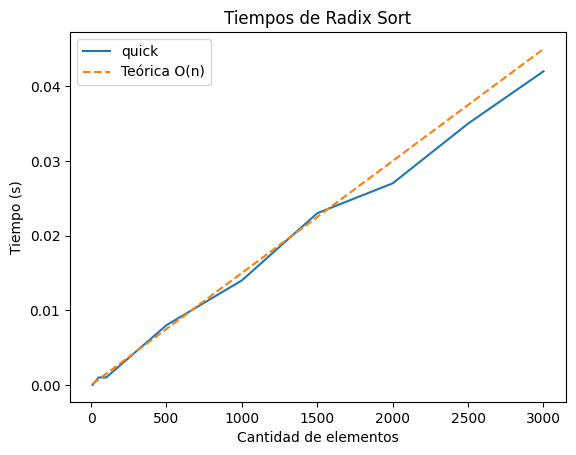

In [36]:
O_n = [0.000015*i for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_radix, label = 'quick')
plt.plot(cantidad_datos, O_n, linestyle='--', label = 'Teórica O(n)')

plt.title('Tiempos de Radix Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

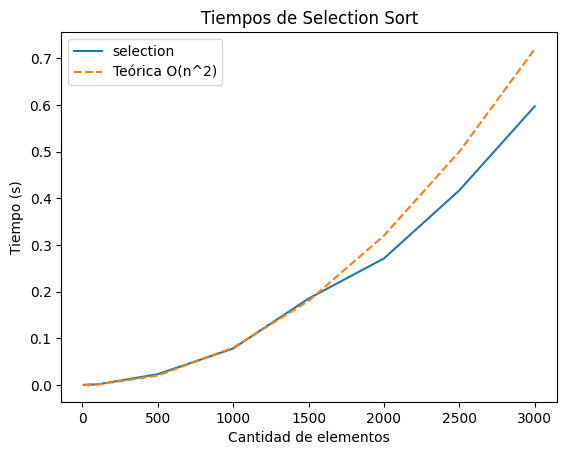

In [37]:
O_n2 = [0.00000008*i**2 for i in cantidad_datos]
plt.plot(cantidad_datos, tiempos_selection, label = 'selection')
plt.plot(cantidad_datos, O_n2, linestyle='--', label = 'Teórica O(n^2)')

plt.title('Tiempos de Selection Sort')
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

### Pruebas Unitarias

In [39]:
def prueba_unitaria(lista):
    for i in lista:
        lista_copia = list(i.copy())
        lista_ordenada = list(i.copy())
        lista_ordenada.sort()
        if lista_copia != lista_ordenada:
            return False
    return True

In [40]:
prueba_unitaria(prueba_insertion)

True

In [41]:
prueba_unitaria(prueba_merge)

True

In [42]:
prueba_unitaria(prueba_quick)

True

In [43]:
prueba_unitaria(prueba_radix)

True

In [44]:
prueba_unitaria(prueba_selection)

True